In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, st_tests, text2features, feature_analysis, cull_data
import pandas as pd
import glob
import os
import re
import numpy as np

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/201902 Stylistics/publication/data/"

In [3]:
corde_freq_df = pd.read_parquet(wdir + "corde_comp_low_7000.pqt")
corde_freq_df.shape

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(34152, 7000)

In [4]:
corde_freq_df.head()

token,de,se,una,para,la,",",en,el,y,a,...,pasamos,veinticinco,vol,tam,vertical,nº,pétalos,bsol,pereza,huellas
aazorin,2126.0,748.0,626.0,130.0,1560.0,3735.0,1274.0,1077.0,1700.0,980.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abacca,4911.0,880.0,879.0,349.0,2808.0,6764.0,2075.0,1790.0,2313.0,1284.0,...,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
abaddon,7327.0,2059.0,1395.0,808.0,4541.0,11181.0,3573.0,3594.0,4248.0,2978.0,...,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
abadengo,5029.0,829.0,358.0,335.0,2155.0,7101.0,2156.0,2351.0,1839.0,1286.0,...,1.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
abajo,1786.0,551.0,300.0,129.0,1117.0,2664.0,625.0,728.0,1310.0,933.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
corde_metadatos_df = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadatos_df.shape

(34155, 17)

In [6]:
corde_metadatos_df.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico


In [7]:
genres_20_lt = corde_metadatos_df.groupby(["siglo","prim_tema"])[["tokens"]].sum().unstack("prim_tema").fillna(0)["tokens"].sum().sort_values(ascending=False).index[0:20]

In [8]:

corde_metadatos_df.rename(columns={"siglo": "century", "prim_tema": "primary_topic"}, inplace=True)


In [9]:
corde_metadatos_df.groupby(["century","primary_topic"])[["tokens"]].sum().unstack("primary_topic").fillna(0)["tokens"][genres_20_lt]

primary_topic,Historia y documentos,Prosa narrativa extensa,Derecho,Religión,Prosa didáctica,Ciencias sociales y humanidades,Sociedad,"Ciencias exactas, físicas y naturales",Verso lírico culto,Ciencias aplicadas,Prosa narrativa breve,Verso dramático extenso,Verso narrativo culto,Artes y espectáculos,Prensa,Prosa dramática extensa,Verso lírico tradicional,Verso dramático breve,Prosa,Verso narrativo tradicional
century,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,1451.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7233.0,0.0,13816.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,8046.0,0.0,131875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6606.0,0.0,405209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0
12,29141.0,0.0,379807.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,837.0,1182.0,0.0,37271.0
13,2499788.0,271269.0,3650730.0,355687.0,325376.0,20197.0,58821.0,1043044.0,51156.0,52192.0,132688.0,0.0,350543.0,0.0,0.0,0.0,496.0,0.0,86883.0,1209.0
14,3067216.0,248793.0,3006973.0,336033.0,346693.0,23436.0,146907.0,0.0,77725.0,95108.0,197373.0,0.0,251960.0,12276.0,0.0,0.0,204.0,0.0,0.0,0.0
15,5237000.0,2485447.0,6504942.0,2715913.0,1791855.0,2189247.0,570150.0,12330.0,1318690.0,1470277.0,316919.0,0.0,55048.0,362640.0,0.0,82610.0,3232.0,47198.0,22158.0,14600.0
16,11993325.0,7274806.0,4615547.0,8392102.0,2261972.0,3236285.0,3157383.0,2957059.0,2772685.0,1570603.0,497388.0,1069736.0,1922514.0,395740.0,337261.0,364185.0,638135.0,220036.0,0.0,32348.0


In [22]:
sorted(corde_metadatos_df.groupby(["century","primary_topic"])[["tokens"]].sum().unstack("primary_topic").fillna(0)["tokens"][genres_20_lt].columns.values.tolist())
 

['Artes y espectáculos',
 'Ciencias aplicadas',
 'Ciencias exactas, físicas y naturales',
 'Ciencias sociales y humanidades',
 'Derecho',
 'Historia y documentos',
 'Prensa',
 'Prosa',
 'Prosa didáctica',
 'Prosa dramática extensa',
 'Prosa narrativa breve',
 'Prosa narrativa extensa',
 'Religión',
 'Sociedad',
 'Verso dramático breve',
 'Verso dramático extenso',
 'Verso lírico culto',
 'Verso lírico tradicional',
 'Verso narrativo culto',
 'Verso narrativo tradicional']

In [26]:
format_ = "png"

def describe_corpus_stackedbars(metadata,  class_2, wdir, dataset, class_1 = "decade", in_proportions = False, legend = "", has_title = True, loc_legend = "lower left", do_cull = True, problematic_values =  ["?","n.av.", None, "unknown","other","mixed", "-"], cmap=""):
    """
        
    """
    if do_cull == True:
        metadata_classes = cull_data.cull_metadata(metadata, class_1, problematic_values)
        metadata_classes = cull_data.cull_metadata(metadata, class_2, problematic_values)
    if in_proportions == True:
        metadata_classes = (metadata_classes.groupby([class_1, class_2])[class_1].count().groupby(level = 0).transform(lambda x: x/x.sum())*100).unstack(class_2).fillna(0).copy()
        title_sub ="(in percentage)"
        ylabel = "Percentage of texts"
    else:
        metadata_classes = metadata.groupby([class_1,class_2])[class_1].count().unstack(class_2).fillna(0).copy()
        title_sub =""
        ylabel = "Number of texts"

    # Color options
    if cmap != "":
        cmap = cmap
    else:
        if len(metadata_classes.columns.tolist()) == 2:
            cmap = "viridis"
        elif "_ordi" in class_2:
            cmap = "viridis_r" # "copper_r"
        elif len(metadata_classes.columns.tolist()) >= 10:
            cmap = "tab20"
        else:
            cmap = "viridis"#'Accent'
    
    
    if has_title == True:
        title = dataset+" by "+class_1+" and "+class_2 + "\n" +title_sub
    else:
        title = ""
    
    ax = metadata_classes.plot(kind='bar', stacked=True, figsize=(12,6), title = title, grid= True,  cmap = cmap)
    ax.set_xlabel(class_1)
    ax.set_ylabel(ylabel)
    fig = ax.get_figure()
    ax.set_axisbelow(True)
    ax.tick_params(axis="x", labelrotation=45)
    if legend == "":
        legend = metadata_classes
    ax.legend(legend, loc = loc_legend, frameon=True, edgecolor="gray", title = class_2, bbox_to_anchor = (1.05, 1) )

    fig.tight_layout()

    #create_dir(wdir, "/visualisations")
    fig.savefig(wdir+"/visualisations/"+dataset+"_barstacked_"+class_1+"_"+class_2+'.'+format_, dpi=300, format=format_)
    fig.show()

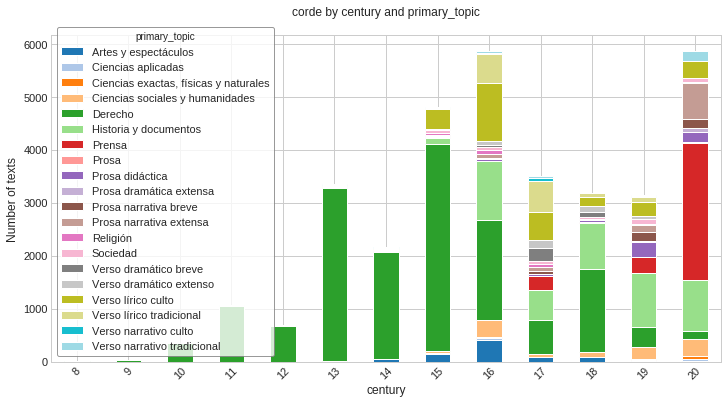

In [24]:
describe_data.describe_corpus_stackedbars(corde_metadatos_df.loc[corde_metadatos_df["primary_topic"].isin(genres_20_lt)], class_2 = "primary_topic", class_1 ="century", wdir = wdir, dataset="corde")
#corde_metadatos_df.groupby(["siglo","prim_tema"])[["prim_tema"]].count().unstack("prim_tema").fillna(0)[genres_20_lt].plot(kind='bar', stacked=True, figsize=(12,6), title = "corde", grid= True, cmap="tab20")

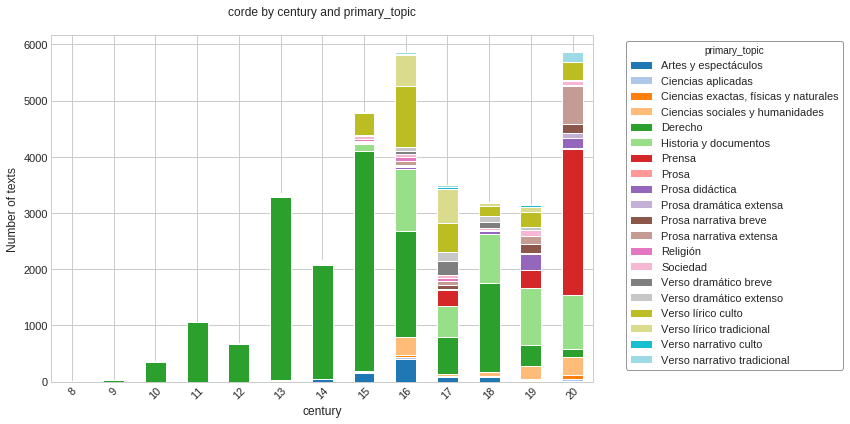

In [28]:
describe_corpus_stackedbars(corde_metadatos_df.loc[corde_metadatos_df["primary_topic"].isin(genres_20_lt)], class_2 = "primary_topic", class_1 ="century", wdir = wdir, dataset="corde", loc_legend = "upper left")

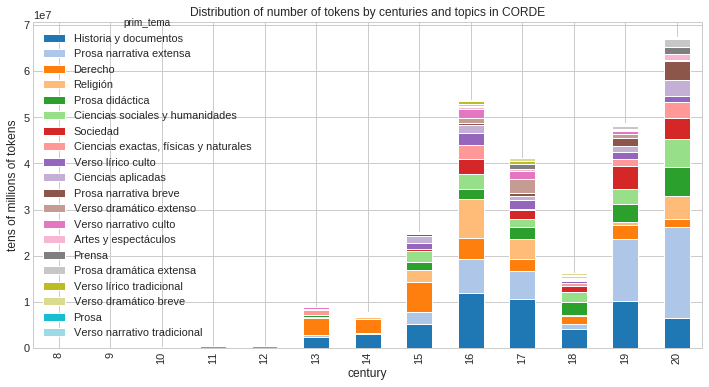

In [12]:
ax = corde_metadatos_df.groupby(["century","primary_topic"])[["tokens"]].sum().unstack("primary_topic").fillna(0)["tokens"][genres_20_lt].plot(kind='bar', stacked=True, figsize=(12,6), title = "Distribution of number of tokens by centuries and topics in CORDE", grid= True, cmap="tab20")
ax.set_xlabel("century")
ax.set_ylabel("tens of millions of tokens")

ax.legend(genres_20_lt, loc = "lower left", frameon=False, edgecolor="gray", title = "prim_tema")

plt.savefig(wdir + "visualisations/" + "corde_tokens.png", dpi=300, format="png")

    

In [77]:
[country for country, freq  in Counter(corde_metadatos_df["pais"]).most_common()][1:]

['Perú',
 'Guatemala',
 'México',
 'Argentina',
 'Filipinas',
 'Ecuador',
 'Colombia',
 'Chile',
 'Costa Rica',
 'Bolivia',
 'Venezuela',
 'Cuba',
 'Rep. Dominicana',
 'Paraguay',
 'Nicaragua',
 'Uruguay',
 'Puerto Rico',
 'Panamá',
 'Honduras',
 'Otros',
 'El Salvador',
 'Estados Unidos']

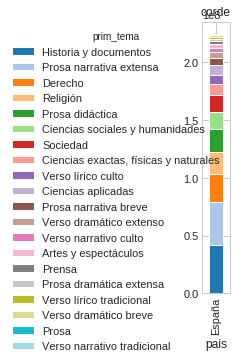

In [84]:
corde_metadatos_df.groupby(["pais","prim_tema"])[["tokens"]].sum().unstack("prim_tema").fillna(0)["tokens"][genres_20_lt].loc[["España"]].plot(kind='bar', stacked=True, figsize=(0.5,5), title = "corde", grid= True, cmap="tab20")

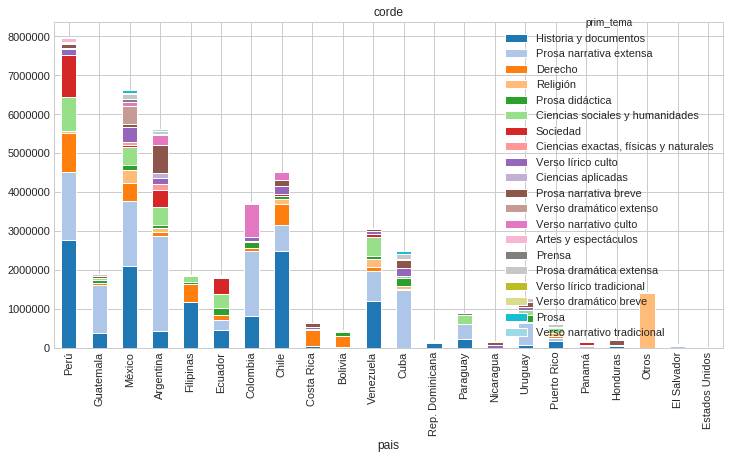

In [78]:
corde_metadatos_df.groupby(["pais","prim_tema"])[["tokens"]].sum().unstack("prim_tema").fillna(0)["tokens"][genres_20_lt].loc[[country for country, freq  in Counter(corde_metadatos_df["pais"]).most_common()][1:]].plot(kind='bar', stacked=True, figsize=(12,6), title = "corde", grid= True, cmap="tab20")

In [ ]:
, loc_legend = "upper left")

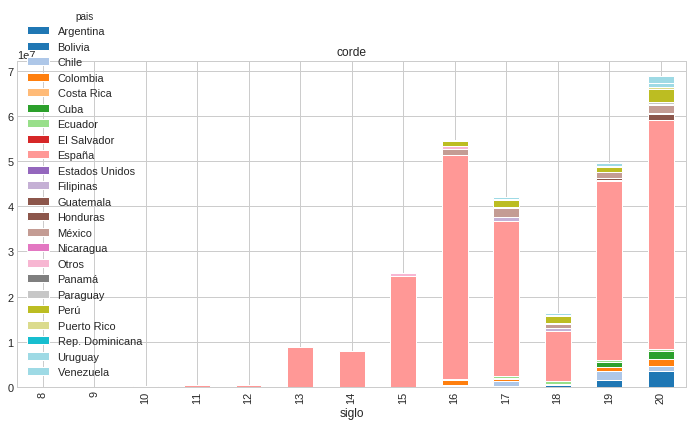

In [86]:
corde_metadatos_df.groupby(["siglo","pais"])[["tokens"]].sum().unstack("pais").fillna(0)["tokens"].plot(kind='bar', stacked=True, figsize=(12,6), title = "corde", grid= True, cmap="tab20")

In [66]:
corde_metadatos_df

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
0,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
1,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
2,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
3,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
4,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico
5,mutissub60,A don Juan José D'Elhuyar [Cartas de José Cele...,"Mutis, José Celestino",Colombia,1787,Historia y documentos: Cartas y relaciones,Libro,57,72,52,1787,18,América,NaN,Historia y documentos,Cartas y relaciones,Técnico
6,docurel1sub275,Fernando concede salvoconducto [Documentos sob...,Anónimo,España,1493,Derecho: Documentos notariales,Revista,289,340,168,1493,15,Europa,NaN,Derecho,Documentos notariales,Técnico
7,docuara1sub44,Pintura de un escudo para el sepulcro de Martí...,Anónimo,España,1413,Artes y espectáculos: Pintura,Libro,49,59,44,1413,15,Europa,NaN,Artes y espectáculos,Pintura,Técnico
8,ordenansub179,"Reglamento [Leyes, reales decretos, reglamento...",Anónimo,España,1908,Derecho: Ordenamientos y códigos legales,Libro,1208,1359,502,1908,20,Europa,NaN,Derecho,Ordenamientos y códigos legales,Técnico
9,corfrenksub195,Versos de Los cancionerillos de Munich (1589-1...,VV.AA.,España,1589 1602,Verso lírico tradicional: Folclórico,Libro,655,835,411,1589,16,Europa,NaN,Verso lírico tradicional,Folclórico,Verso
